In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from omegaconf import OmegaConf
from hydra import compose, initialize
import matplotlib.pyplot as plt
import warnings
from erank.trainer import get_trainer_class
from erank.utils import load_model_from_epoch, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
import pickle
gpu_id = 0

In [2]:
# run single experiment in notebook
def run_experiment(config_name: str):
    with initialize(version_base=None, config_path='../configs/'):
        warnings.filterwarnings('once')
        cfg = compose(config_name=config_name)
        cfg = cfg.config
        cfg.experiment_data.experiment_dir = Path().cwd()
        trainer_class = get_trainer_class(cfg.trainer.training_setup)
        trainer = trainer_class(config=cfg)
        trainer.train()

In [3]:
config_name = 'config_debug_sl_sinus.yaml'
# run_experiment(config_name=config_name)

## Erank plots

In [15]:
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_234805'
sweep_output_path = Path(sweep_dir) / 'outputs'
num_vectors=1900

In [5]:
# check for missing best_epoch_files
# for p in sweep_output_path.iterdir():
#     bepf = p / 'best_epoch.txt'
#     if not bepf.exists():
#         print(str(p))

In [6]:
sine_task_distr = {'normal': '*ampl-0.1_5.0-ph-0_3.141592654*', 
                    'wide': '*ampl-0.1_10.0-ph-0_3.141592654*',
                    'narrow': '*ampl-0.1_2.5-ph-0_1.5*',
                    'almost_point': '*ampl-1.0_1.1-ph-0_0.1*'}

In [7]:
len(sine_task_distr)

4

In [8]:
# load a model
run = next(iter(sweep_output_path.iterdir()))
init_model = load_model_from_epoch(run, epoch=0, device='cpu')

In [9]:
# load model matrices
model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
                                                   name_run_glob_pattern_dict=sine_task_distr,
                                                   num_runs=num_vectors,
                                                   device='cpu')
with open(f'model_dict_num_vecs{num_vectors}.p', 'wb') as savefile:
    pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOCOL)

Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_234805/outputs/sl-sine-10.0.1-sl-randinit-ampl-0.1_5.0-ph-0_3.141592654-taskidx-999-seed0_220913_035813: 100%|██████████| 1900/1900 [16:34<00:00,  1.91it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_234805/outputs/sl-sine-10.0.1-sl-randinit-ampl-0.1_10.0-ph-0_3.141592654-taskidx-999-seed0_220913_080118: 100%|██████████| 1900/1900 [16:18<00:00,  1.94it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_234805/outputs/sl-sine-10.0.1-sl-randinit-ampl-0.1_2.5-ph-0_1.5-taskidx-999-seed0_220913_080531: 100%|██████████| 1900/1900 [16:14<00:00,  1.95it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/sl-sine-10.0.1-sl-randinit-ampl-XXX-ph-XXX-taskidx-XXX_220912_2

In [10]:
list(model_dict.keys())

['normal#*ampl-0.1_5.0-ph-0_3.141592654*',
 'wide#*ampl-0.1_10.0-ph-0_3.141592654*',
 'narrow#*ampl-0.1_2.5-ph-0_1.5*',
 'almost_point#*ampl-1.0_1.1-ph-0_0.1*']

Calculate eranks: 100%|██████████| 191/191 [02:06<00:00,  1.51it/s]


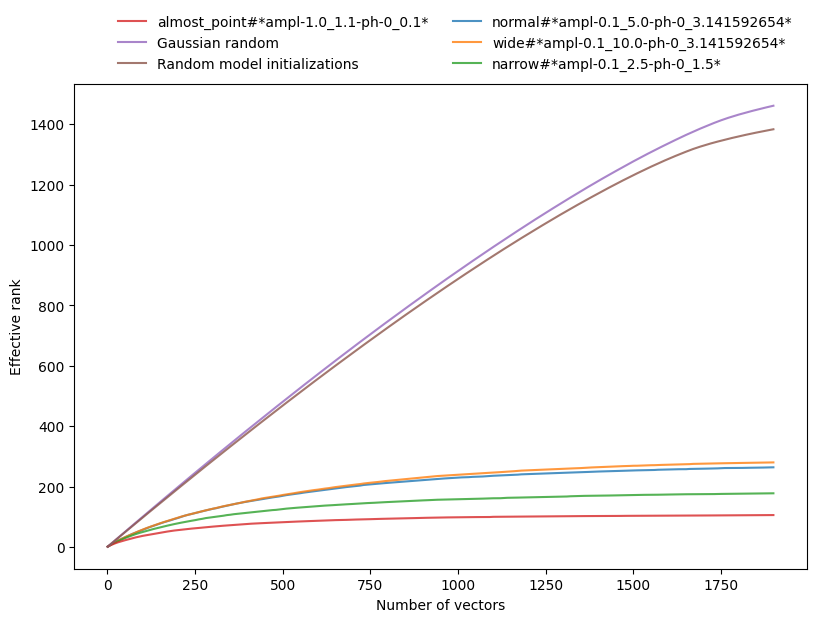

In [11]:
fig, ax = plot_models_erank(models=model_dict, random_init_model=init_model, device='cuda')

In [16]:
fig.savefig(f'sinus_erank_varying_task_distribution_num_vecs{num_vectors}.pdf', bbox_inches='tight')

In [17]:
fig.savefig(f'sinus_erank_varying_task_distribution_num_vecs{num_vectors}.png', dpi=300, bbox_inches='tight')